In [1]:
import numpy as np

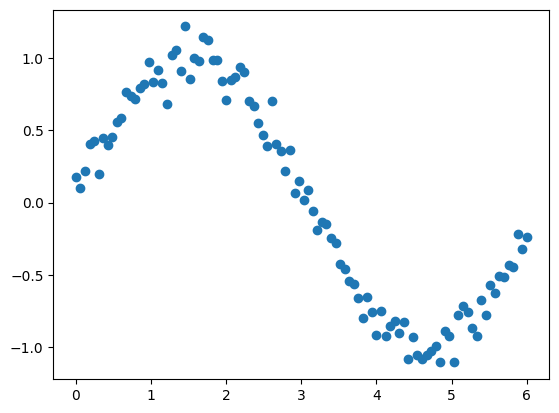

In [2]:
#create a toy dataset, sine function with noise
np.random.seed(0)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

#plot the data
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [3]:
#define a low level neural network with numpy, 1 hidden layer with 10 neurons
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
    
    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.z2
        return self.a2
    
    def loss(self, X, y):
        y_pred = self.forward(X)
        return np.sum((y_pred - y)**2)
    
    def backward(self, X, y):
        y_pred = self.forward(X)
        m = X.shape[0]
        dy = 2.0 * (y_pred - y)
        dW2 = self.a1.T.dot(dy)
        db2 = np.sum(dy, axis=0)
        dz1 = dy.dot(self.W2.T) * (1 - self.a1**2)
        dW1 = X.T.dot(dz1)
        db1 = np.sum(dz1, axis=0)
        return dW1, db1, dW2, db2
    
    def train(self, X, y, learning_rate=0.01, epochs=1000):
        for i in range(epochs):
            dW1, db1, dW2, db2 = self.backward(X, y)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            if i % 100 == 0:
                print(f'Epoch {i}, loss: {self.loss(X, y)}')
    
    def predict(self, X):
        return self.forward(X)

In [4]:
#train the neural network
nn = NeuralNetwork(1, 10, 1)
nn.train(X, y)  

ValueError: shapes (100,100) and (1,10) not aligned: 100 (dim 1) != 1 (dim 0)